In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import yfinance as yf 
from yahoofinancials import YahooFinancials

To begin, we download stock data for Google for a period of a year. Once loaded into a dataframe we have a brief look at the data. Usually, during this step, Analysts and Machine Learning Engineers would perform something called EDA & Data Wrangling. I would not concern yourself with this; for now, be aware that this process exists and is common practice. 

In [2]:
stocks_df = yf.download('GOOGL',
                      start='2021-01-01', 
                      end='2021-11-02', 
                      progress=False)

In [3]:
stocks_df.head(10)

Open         High          Low        Close    Adj Close  \
Date                                                                          
2020-12-31  1737.270020  1757.500000  1736.089966  1752.640015  1752.640015   
2021-01-04  1760.000000  1762.489990  1707.140015  1726.130005  1726.130005   
2021-01-05  1725.089966  1746.829956  1716.900024  1740.050049  1740.050049   
2021-01-06  1700.260010  1743.969971  1696.099976  1722.880005  1722.880005   
2021-01-07  1726.760010  1777.819946  1726.760010  1774.339966  1774.339966   
2021-01-08  1777.160034  1799.359985  1761.219971  1797.829956  1797.829956   
2021-01-11  1777.020020  1784.380005  1752.140015  1756.290039  1756.290039   
2021-01-12  1745.359985  1767.900024  1716.380005  1737.430054  1737.430054   
2021-01-13  1727.319946  1756.390015  1727.319946  1747.250000  1747.250000   
2021-01-14  1748.869995  1767.550049  1726.069946  1730.920044  1730.920044   

             Volume  
Date                 
2020-12-31  1053500  
2021-01-04  1866200  
2021-01-05  1018000  
2021-01-06  2329400  
2021-01-07  2096800  
2021-01-08  1774200  
2021-01-11  1739800  
2021-01-12  1476400  
2021-01-13  1171600  
2021-01-14  1460600

In [4]:
print(stocks_df.info())

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 211 entries, 2020-12-31 to 2021-11-01
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       211 non-null    float64
 1   High       211 non-null    float64
 2   Low        211 non-null    float64
 3   Close      211 non-null    float64
 4   Adj Close  211 non-null    float64
 5   Volume     211 non-null    int64  
dtypes: float64(5), int64(1)
memory usage: 11.5 KB
None


The assumption here is that the data is clean and ready for use. Our task is to predict the stock's close price; this can be useful when deciding whether to buy, sell, or hold shares. 

We create a new dataframe and assign it just the value of close stock values for ease of use. 

In [5]:
close_df = stocks_df[['Close']]

In [6]:
close_df.head(10)

Close
Date                   
2020-12-31  1752.640015
2021-01-04  1726.130005
2021-01-05  1740.050049
2021-01-06  1722.880005
2021-01-07  1774.339966
2021-01-08  1797.829956
2021-01-11  1756.290039
2021-01-12  1737.430054
2021-01-13  1747.250000
2021-01-14  1730.920044

Graphing helps visualize the `trend` in the data. What we mean by this is the pattern found in our time series data. In this case, we have an upwards trend, so the stock data value is increasing over a year. There are minor fluctuations, but once we view the rolling average/exponential weighted mean `(EWM)` /exponential moving average `(EMA)` this trend will become clearer

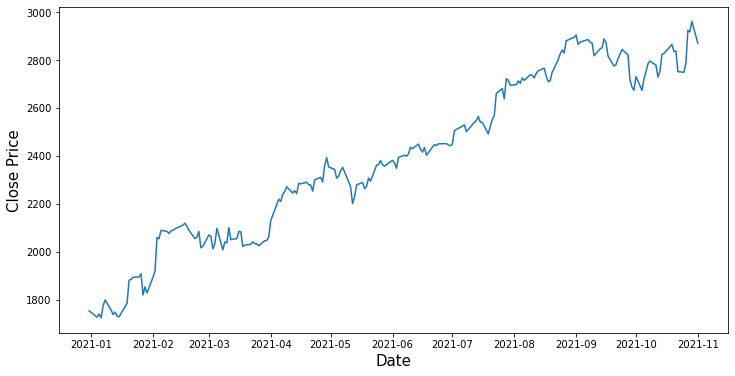

In [7]:
plt.figure(figsize = (12,6))
plt.plot(close_df)
plt.xlabel('Date',fontsize=15)
plt.ylabel('Close Price',fontsize=15)
plt.show()

`pip install pandas-ta`

There are two almost identical methods to calculate the Rolling Avg. For `Method 1` below, we use an advanced Python package pandas_ta to calculate the EMA. 

In [8]:
import pandas_ta as ta

close_df.ta.ema(close='Close', length=10)

Date
2020-12-31            NaN
2021-01-04            NaN
2021-01-05            NaN
2021-01-06            NaN
2021-01-07            NaN
                 ...     
2021-10-26    2792.576593
2021-10-27    2816.535412
2021-10-28    2834.798061
2021-10-29    2857.729308
2021-11-01    2859.949423
Name: EMA_10, Length: 211, dtype: float64

For `Method 2`, we use pandas EWA method over 10 days. 

In [9]:
close_df['Close'].ewm(span=10,min_periods=10,adjust=False,ignore_na=False).mean()

Date
2020-12-31            NaN
2021-01-04            NaN
2021-01-05            NaN
2021-01-06            NaN
2021-01-07            NaN
                 ...     
2021-10-26    2792.576593
2021-10-27    2816.535412
2021-10-28    2834.798061
2021-10-29    2857.729308
2021-11-01    2859.949423
Name: Close, Length: 211, dtype: float64

For proof, I've shown that both methods return the same values. I will stick with pandas_ta method, as **append** the values to our close_df dataframe. We now have two columns, close prices and the 10 day rolling avg 

In [10]:
close_df.ta.ema(close='Close', length=10, append=True)

C:\ProgramData\Anaconda3\lib\site-packages\pandas_ta\core.py:426: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[ind_name] = result


Date
2020-12-31            NaN
2021-01-04            NaN
2021-01-05            NaN
2021-01-06            NaN
2021-01-07            NaN
                 ...     
2021-10-26    2792.576593
2021-10-27    2816.535412
2021-10-28    2834.798061
2021-10-29    2857.729308
2021-11-01    2859.949423
Name: EMA_10, Length: 211, dtype: float64

In [11]:
close_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 211 entries, 2020-12-31 to 2021-11-01
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Close   211 non-null    float64
 1   EMA_10  202 non-null    float64
dtypes: float64(2)
memory usage: 4.9 KB


Note that the first 10 entries are empty. There are numerous ways to deal with this; however, I'm just going to drop them for simplicity. 

In [12]:
close_df = close_df.iloc[10:]

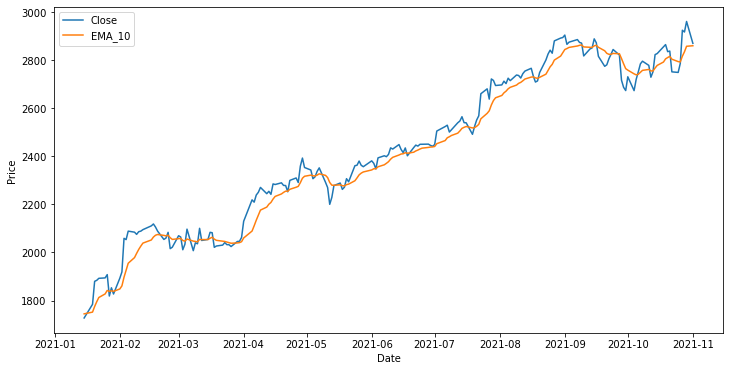

In [13]:
plt.figure(figsize = (12,6))
plt.plot(close_df)
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend(['Close','EMA_10'])

Okay, so now we have plotted the rolling avg to better describe the `trend` in the data. Now we can easily see that that the trend is increasing. However, there is another reason for calculating the rolling avg. The Linear Regression model finds it difficult to predict prices from simply the time and stock. This issue is also known as `autocorrelation`. Linear Regression assumes there is a linear relationship between dependent and independent values. In this case, time-series data is highly autocorrelation meaning this assumption is broken. However, all is not lost; as we have calculated the rolling avg, we now have a more suitable independent variable. 

https://towardsdatascience.com/simulation-of-the-linear-regression-model-with-autocorrelated-errors-b5606186f406

In [14]:
from sklearn.model_selection import train_test_split

The next step is to split the train and test data. This is a fundamental part of Machine Learning, and there is a lot of theory behind it which you will learn in detail in your next module. For now, I want you to know that it's an important step in the process.

In [15]:
x_train, x_test, y_train, y_test = train_test_split(close_df[['Close']], close_df[['EMA_10']], test_size=.2)

In [16]:
x_train

Close
Date                   
2021-09-24  2844.300049
2021-02-17  2118.620117
2021-06-28  2450.719971
2021-01-22  1892.560059
2021-04-16  2282.750000
...                 ...
2021-10-27  2924.350098
2021-04-13  2254.429932
2021-09-20  2774.389893
2021-09-14  2850.889893
2021-09-23  2824.320068

[160 rows x 1 columns]

In [17]:
x_test

Close
Date                   
2021-10-25  2748.939941
2021-04-14  2241.909912
2021-02-10  2086.479980
2021-03-19  2026.959961
2021-06-15  2428.389893
2021-05-24  2361.040039
2021-05-19  2271.500000
2021-02-12  2095.030029
2021-10-05  2720.459961
2021-02-22  2054.260010
2021-03-30  2046.469971
2021-02-02  1919.119995
2021-05-18  2262.469971
2021-08-31  2893.949951
2021-07-12  2539.510010
2021-08-13  2754.550049
2021-09-15  2888.590088
2021-06-29  2445.449951
2021-08-17  2733.229980
2021-06-14  2448.909912
2021-07-09  2510.370117
2021-08-12  2743.879883
2021-10-01  2730.860107
2021-04-05  2218.959961
2021-07-01  2448.889893
2021-06-23  2442.540039
2021-07-22  2568.429932
2021-05-03  2343.080078
2021-02-24  2083.810059
2021-07-16  2539.399902
2021-08-27  2880.080078
2021-04-08  2250.429932
2021-08-20  2748.590088
2021-10-04  2673.189941
2021-07-02  2505.149902
2021-04-20  2279.010010
2021-07-28  2721.879883
2021-10-21  2837.719971
2021-03-23  2041.329956
2021-06-11  2430.199951
2021-01-26  1907.949951

In [18]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

### ${Y}_i = {\beta}_0 + {\beta}_1 {X}_i $

So here is the Linear Regression equation and how we use it in learning. From here, we `train` on our dataset, building our model. Once this is complete, we ask our model to predict the avg stock price.

In [19]:
linearReg = LinearRegression()

In [20]:
linearReg.fit(x_train, y_train)

LinearRegression()

In [21]:
y_pred = linearReg.predict(x_test)

Here, we can view how our model performed. The Mean Absolute error indicates that the model is doing well but not perfect, while our R2 score indicates a good fit. 

In [22]:
print("Model Coefficients:", linearReg.coef_)
print("Mean Absolute Error:", mean_absolute_error(y_test, y_pred))
print("R2 Score:", r2_score(y_test, y_pred))

Model Coefficients: [[1.00088422]]
Mean Absolute Error: 30.102301150686124
R2 Score: 0.9815255759151504


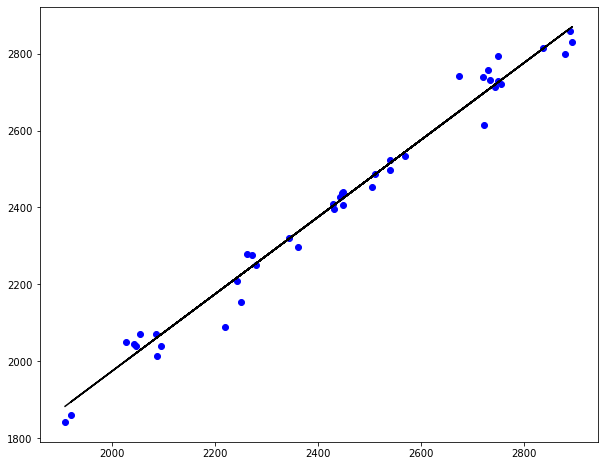

In [23]:
plt.figure(figsize = (10,8))
plt.scatter(x_test,y_test, color='blue')
plt.plot(x_test,y_pred, color='black')

The final plot shows exactly this, with a model that is performing well but could be improved. 

### Task
1) Change two parameters in Linear Model and discuss how this changes your prediction. 
2) Discuss how Linear Regression works. Answers must include a description of **line of best fit**, **independent** and **dependent** variables, and the **Sum of least Squares.**
3) **Exemplary:** Support explanations through graphs 

## Your Work

### Part B
Use the tutorial notebook provided to explore and understand some basics of Machine Learning. The task itself is to use the Linear Regression model to predict stocks prices.

#### Finally discuss in your own words how the Linear model works, in particular, mention the line of best fit, independent and dependent variables and the sum of least squares. <br>
Linear regression is to find out the relationship between the independent variales and the dependent variable. <br>
It works by finding the line of best fit across the training dataset. <br>
In the end, we can use the trained model to predict the dependent variable. 

**Independent and Dependent Variables**: <br>
- Independent Variables: There can be one or more independent variables. These are the variable/s that are used to train and predict the estimated dependent variable.
- Dependent Variable: There is only dependent variable. These are the variables that are mainly used in training of the model.

Linear regression models the relationship between independent variables and dependent variable. However, correlation does not imply causation.<br>
Even if we can determine the relationship, we can't say the indepenent variables cause the dependent variable to change.<br>
e.g. Ice cream sales might have positive sunglasses sales but increase in ice cream sales does not cause sunglass sales to increase. So It will be best to use temperature as the independent variable.<br> 
Therefore, understanding of the underlying variable just as important as the modeling itself.
<br><br>

**Line of Best Fit**: <br>
y = c + b1(x1) + b2(x2) + ...<br>
This is the most important output of the linear regression. It plots the linear relationship between the independent variables to the dependent variable.<br>
The process of finding the line of best fit usually involves an iterative approach. It tries different combinations of coefficients (c, b1, b2.. above) to minimize the total variances of each raw data point to the line of best fit. <br>
The higher the coefficients (e.g. b1, b2), the more those coefficients will affect the dependent variales. <br>

c: the y intercept when coefficients(b1, b2, etc) are 0, also call bias <br>
b1: how effective x1 will affect the value of y<br>
x1, x2: the independent variable <br>
b2: how effective x2 will affect the value of y<br>
y: the predicted dependent variable
<br><br>

**Sum of Least Squares**: <br>
The least squares method is one of the most popular method for linear regression. It does that by minimizing the sum of all the squares of the variance for all the data points.<br>
For each data point:
1. We find the vertical distance between the data point and the black line.
2. In order to prevent the distance(postive/negative) netting of each other, we square difference.

And the Line of Best Fit is the line that has the least sum of squares for all data points.
<br><br>

**R Square**<br>
R Square tells us how effective the change in an indepdent variable in changing dependent variable.
<br><br>

**P-Values**<br>
On top of deriving how effective a independent variable is when predicting the dependent variable, we also have to consider if the result is statistically significant.<br>
This is where the p-values come in. As a general rule of thumb, A lower p-value suggests that changes in this indepedent variable is likely to be a meaningful addition to the model.


<br><br>
P.S. refers to the below graph. In simple terms, we are trying to minimize the distances(absolute) of all the blue points to the black line(Line of Best Fit).<br>
It only shows the first 10 data points for clear illustation of the lines between data points and the line of best fit.<br>

Text(0, 0.5, 'Close Price')

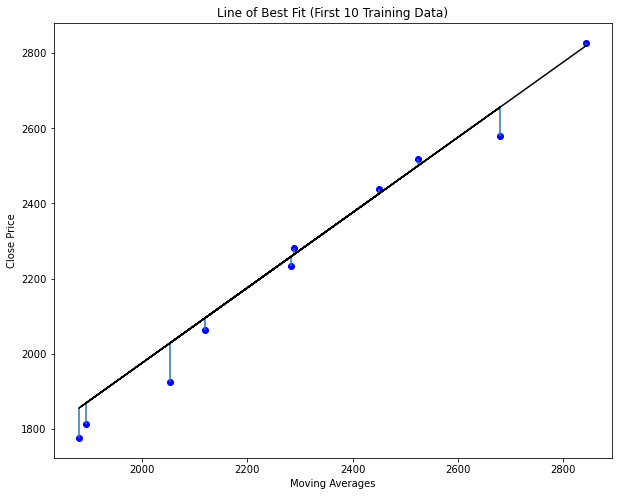

In [24]:
data_points = 10
plt.figure(figsize=(10, 8))
y_train_pred = linearReg.predict(x_train)
plt.scatter(x_train[:data_points], y_train[:data_points], color='blue')
plt.vlines(x_train[:data_points], y_train[:data_points], y_train_pred[:data_points])
plt.plot(x_train[:data_points], y_train_pred[:data_points], color='black')
plt.title(f'Line of Best Fit (First {data_points} Training Data)')
plt.xlabel("Moving Averages")
plt.ylabel("Close Price")
